In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Additional Information
 - InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
 - StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
 - Description: Product (item) name. Nominal. 
 - Quantity: The quantities of each product (item) per transaction. Numeric. InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 
 - UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. Country: Country name. Nominal. The name of the country where a customer resides.


In [3]:
# reading data
# 2009 - 2010
df = pd.read_excel('../online_retail_II.xlsx')

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2010-12-09 20:01:00'))

In [8]:
# reading data 2010 - 2011
df1 = pd.read_excel('../online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
df1['InvoiceDate'].min(), df1['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [11]:
df = df.append(df1, ignore_index=True)

In [12]:
df.shape

(1067371, 8)

In [13]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Data Cleaning

In [14]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [19]:
df[df.isnull()].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1001743,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
47808,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
373665,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
595992,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
66623,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
626441,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
787192,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
82301,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
787959,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
759640,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [29]:
df.dropna(axis=0, inplace=True)

In [30]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [32]:
df.shape

(824364, 8)

In [47]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [48]:
df['Total Amount'] = df['Quantity'] * df['Price']

### Remove Cancellation Order

In [54]:
df[df['Invoice'].str.startswith('C') == True].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4


In [56]:
df['Invoice'].str.startswith('C').count()

18744

In [58]:
df_cleaned = df[~df['Invoice'].str.contains('C', na=False)]

In [60]:
# the same to above
df.drop(labels=df[df['Invoice'].str.startswith('C') == True].index).shape

(805620, 9)

In [59]:
df_cleaned.shape

(805620, 9)

In [61]:
df_cleaned.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount
340923,522635,22948,METAL DECORATION NAUGHTY CHILDREN,24,2010-09-16 09:54:00,0.85,13089.0,United Kingdom,20.40
520117,537689,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-08 10:36:00,0.29,15750.0,United Kingdom,13.92
343408,522914,21621,VINTAGE UNION JACK BUNTING,2,2010-09-17 13:53:00,8.50,17139.0,United Kingdom,17.00
134664,502247,84625B,BLCK NEW BAROQUE CANDLESTICK CANDLE,6,2010-03-23 13:52:00,2.95,17147.0,United Kingdom,17.70
757791,557314,21746,SMALL RED RETROSPOT WINDMILL,12,2011-06-19 15:59:00,1.25,12541.0,Spain,15.00
1055478,580771,22638,SET OF 4 NAPKIN CHARMS CROWNS,4,2011-12-06 10:58:00,0.79,16015.0,United Kingdom,3.16
1022953,578375,23089,GLASS BON BON JAR,72,2011-11-24 11:41:00,1.65,16157.0,United Kingdom,118.80
14012,490512,21949,SET OF 6 STRAWBERRY CHOPSTICKS,1,2009-12-06 14:54:00,1.25,14606.0,United Kingdom,1.25
502287,536241,22746,POPPY'S PLAYHOUSE LIVINGROOM,12,2010-11-30 14:35:00,2.10,12471.0,Germany,25.20
597890,542246,22847,BREAD BIN DINER STYLE IVORY,1,2011-01-26 15:31:00,16.95,15227.0,United Kingdom,16.95


### Expolaratory Data Analysis

In [63]:
# number of unique products
df_cleaned['Description'].nunique()

5283

In [62]:
df_cleaned['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    5181
REGENCY CAKESTAND 3 TIER              3430
ASSORTED COLOUR BIRD ORNAMENT         2777
JUMBO BAG RED RETROSPOT               2702
REX CASH+CARRY JUMBO SHOPPER          2141
                                      ... 
CIRCUS PARADE LUNCHBOX                   1
WALL ART,ONLY ONE PERSON                 1
ASSORTED SHAPED STENCIL FOR HENNA        1
GLASS JAR, ENGLISH CONFECTIONERY         1
BAROQUE BUTTERFLY EARRINGS RED           1
Name: Description, Length: 5283, dtype: int64

In [64]:
# Top 10 most sold products
df_cleaned.groupby(by='Description').agg({'Quantity' : 'sum'}).sort_values(by = 'Quantity',ascending=False).head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,109169
WHITE HANGING HEART T-LIGHT HOLDER,93640
"PAPER CRAFT , LITTLE BIRDIE",80995
ASSORTED COLOUR BIRD ORNAMENT,79913
MEDIUM CERAMIC TOP STORAGE JAR,77916
JUMBO BAG RED RETROSPOT,75759
BROCADE RING PURSE,71129
PACK OF 60 PINK PAISLEY CAKE CASES,55270
60 TEATIME FAIRY CAKE CASES,53495


In [67]:
df_cleaned['Country'].value_counts()

United Kingdom          725296
Germany                  16703
EIRE                     15745
France                   13813
Netherlands               5093
Spain                     3720
Belgium                   3069
Switzerland               3012
Portugal                  2446
Australia                 1815
Channel Islands           1569
Italy                     1468
Norway                    1437
Sweden                    1319
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    798
Greece                     657
Unspecified                521
Poland                     512
Japan                      485
USA                        409
United Arab Emirates       383
Singapore                  339
Israel                     322
Malta                      282
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        123
Brazil                      94
Thailand

### RFM Analysis

In [74]:
df_cleaned['InvoiceDate'].min(), df_cleaned['InvoiceDate'].max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2011-12-09 12:50:00'))

In [75]:
toDay_date = dt.datetime(2011,12,10)
toDay_date

datetime.datetime(2011, 12, 10, 0, 0)

In [95]:
rfm = df_cleaned.groupby(by='Customer ID').agg({'InvoiceDate' : lambda x : (toDay_date - x.max()).days,
                                               'Invoice' : lambda x : x.nunique(),
                                               'Total Amount' : lambda x : x.sum()})

In [96]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [97]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,325,12,77556.46
12347.0,2,8,5633.32
12348.0,75,5,2019.40
12349.0,18,4,4428.69
12350.0,310,1,334.40


In [98]:
rfm.shape

(5881, 3)

In [90]:
rfm[rfm['Monetary']  == 0]

,Recency,Frequency,Monetary
Customer ID,,,
13256.0,14,1,0.0
14103.0,665,1,0.0
14827.0,665,1,0.0


In [99]:
rfm = rfm[rfm['Monetary'] > 0]

In [100]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,5878.0,200.866791,209.353961,0.00,25.0000,95.000,379.00,738.00
Frequency,5878.0,6.289895,13.015651,1.00,1.0000,3.000,7.00,398.00
Monetary,5878.0,3018.616737,14737.731040,2.95,348.7625,898.915,2307.09,608821.65


In [101]:
rfm['Monetary'].min(), rfm['Monetary'].max()

(2.95, 608821.65)

In [108]:
rfm['Recency_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])

In [116]:
rfm['Frequency score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])

In [118]:
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [120]:
rfm.sample(10)

,Recency,Frequency,Monetary,Recency_score,Frequency score,Monetary_Score
Customer ID,,,,,,
17366.0,432,2,1096.24,1,3,3
12431.0,35,27,10857.97,4,5,5
17935.0,138,7,686.14,3,4,3
15100.0,333,7,2894.70,2,4,4
16873.0,4,12,14617.39,5,5,5
14469.0,416,4,2112.21,1,3,4
17210.0,392,1,253.37,2,2,1
15590.0,382,5,1496.60,2,4,4
17744.0,3,7,2649.14,5,4,4


In [124]:
rfm['RFM_Score'] = rfm['Recency_score'].astype(str) + rfm['Frequency score'].astype(str)

In [125]:
rfm.sample(10)

,Recency,Frequency,Monetary,Recency_score,Frequency score,Monetary_Score,RFM_Score
Customer ID,,,,,,,
14388.0,10,16,6701.00,5,5,5,55
16637.0,32,4,1154.47,4,4,3,44
12388.0,15,8,3901.11,5,4,5,54
16566.0,15,5,614.66,5,4,2,54
15348.0,72,1,158.04,3,1,1,31
16340.0,107,3,1526.06,3,3,4,33
16583.0,373,2,531.40,2,2,2,22
14160.0,610,7,8421.47,1,4,5,14
14880.0,77,3,706.19,3,3,3,33


In [126]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [127]:
rfm['Segment'] = rfm['RFM_Score'].replace(seg_map, regex=True)
rfm.reset_index(inplace=True)

In [128]:
rfm.sample(10)

,Customer ID,Recency,Frequency,Monetary,Recency_score,Frequency score,Monetary_Score,RFM_Score,Segment
1775,14142.0,373,2,983.15,2,2,3,22,hibernating
1407,13771.0,64,9,5728.82,3,5,5,35,loyal_customers
913,13266.0,11,19,6135.04,5,5,5,55,champions
4327,16717.0,23,14,6986.23,4,5,5,45,loyal_customers
11,12357.0,33,3,18287.66,4,3,5,43,potential_loyalists
3834,16218.0,29,13,4439.97,4,5,5,45,loyal_customers
4167,16554.0,42,8,2841.72,4,5,4,45,loyal_customers
5510,17918.0,500,3,396.39,1,3,2,13,at_Risk
1292,13654.0,43,11,6308.00,4,5,5,45,loyal_customers
4763,17160.0,31,17,10209.16,4,5,5,45,loyal_customers


In [129]:
rfm.groupby(by = 'Segment').agg({'Customer ID':'count'}).sort_values('Customer ID', ascending=False)

,Customer ID
Segment,
hibernating,1522
loyal_customers,1147
champions,852
at_Risk,750
potential_loyalists,713
about_to_sleep,388
need_attention,269
promising,110
cant_loose,71


In [130]:
# avg 
rfm[["Recency", "Frequency", "Monetary"]].agg(["mean"])

,Recency,Frequency,Monetary
mean,200.866791,6.289895,3018.616737


In [131]:
rfm[['Segment', 'Recency', 'Frequency', 'Monetary']].groupby(by='Segment').agg(['mean', 'count', 'sum'])

Recency                Frequency               \
                           mean count     sum       mean count    sum   
Segment                                                                 
about_to_sleep       106.618557   388   41368   1.360825   388    528   
at_Risk              372.942667   750  279707   3.904000   750   2928   
cant_loose           330.802817    71   23487  15.929577    71   1131   
champions              8.250000   852    7029  19.217136   852  16373   
hibernating          459.012484  1522  698617   1.252300  1522   1906   
loyal_customers       67.306016  1147   77200   9.803836  1147  11245   
need_attention       113.241636   269   30462   3.156134   269    849   
new_customers         10.303571    56     577   1.000000    56     56   
potential_loyalists   25.297335   713   18037   2.589060   713   1846   
promising             38.281818   110    4211   1.000000   110    110   

                         Monetary                     
                             mean count          sum  
Segment                                               
about_to_sleep         531.969905   388   206404.323  
at_Risk               1383.596253   750  1037697.190  
cant_loose            8355.677634    71   593253.112  
champions            10795.520581   852  9197783.535  
hibernating            437.963135  1522   666579.892  
loyal_customers       4199.728592  1147  4817088.695  
need_attention        1283.114015   269   345157.670  
new_customers          356.257857    56    19950.440  
potential_loyalists   1155.427281   713   823819.651  
promising              324.497000   110    35694.670

In [155]:
data = rfm[['Segment', 'Recency', 'Frequency', 'Monetary']].groupby(by='Segment').agg(['mean'])
data

,Recency,Frequency,Monetary
,mean,mean,mean
Segment,,,
about_to_sleep,106.618557,1.360825,531.969905
at_Risk,372.942667,3.904000,1383.596253
cant_loose,330.802817,15.929577,8355.677634
champions,8.250000,19.217136,10795.520581
hibernating,459.012484,1.252300,437.963135
loyal_customers,67.306016,9.803836,4199.728592
need_attention,113.241636,3.156134,1283.114015
new_customers,10.303571,1.000000,356.257857


In [157]:
data.columns = ['_'.join(col) for col in data.columns.values]

In [158]:
data

,Recency_mean,Frequency_mean,Monetary_mean
Segment,,,
about_to_sleep,106.618557,1.360825,531.969905
at_Risk,372.942667,3.904000,1383.596253
cant_loose,330.802817,15.929577,8355.677634
champions,8.250000,19.217136,10795.520581
hibernating,459.012484,1.252300,437.963135
loyal_customers,67.306016,9.803836,4199.728592
need_attention,113.241636,3.156134,1283.114015
new_customers,10.303571,1.000000,356.257857
potential_loyalists,25.297335,2.589060,1155.427281


In [163]:
data.reset_index(inplace=True)

In [164]:
data

,Segment,Recency_mean,Frequency_mean,Monetary_mean
0,about_to_sleep,106.618557,1.360825,531.969905
1,at_Risk,372.942667,3.904000,1383.596253
2,cant_loose,330.802817,15.929577,8355.677634
3,champions,8.250000,19.217136,10795.520581
4,hibernating,459.012484,1.252300,437.963135
5,loyal_customers,67.306016,9.803836,4199.728592
6,need_attention,113.241636,3.156134,1283.114015
7,new_customers,10.303571,1.000000,356.257857
8,potential_loyalists,25.297335,2.589060,1155.427281
9,promising,38.281818,1.000000,324.497000


In [210]:
df_melt = pd.melt(data, id_vars='Segment', var_name='RFM', value_name='RFM Value')
df_melt = df_melt[df_melt['RFM'].isin(['Recency_mean', 'Frequency_mean'])]
df_melt

,Segment,RFM,RFM Value
0,about_to_sleep,Recency_mean,106.618557
1,at_Risk,Recency_mean,372.942667
2,cant_loose,Recency_mean,330.802817
3,champions,Recency_mean,8.250000
4,hibernating,Recency_mean,459.012484
5,loyal_customers,Recency_mean,67.306016
6,need_attention,Recency_mean,113.241636
7,new_customers,Recency_mean,10.303571
8,potential_loyalists,Recency_mean,25.297335
9,promising,Recency_mean,38.281818


In [134]:
import seaborn as sns

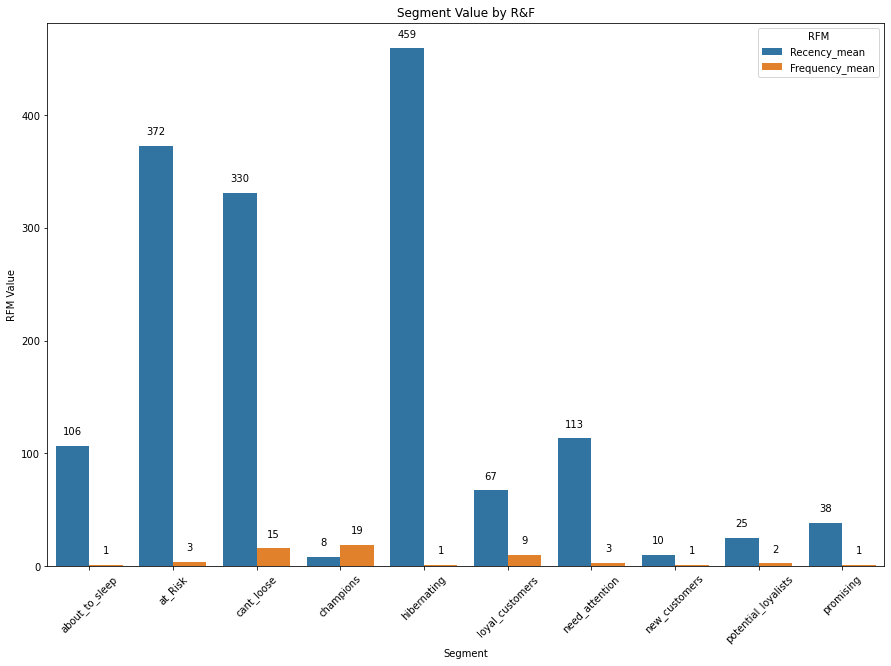

In [212]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=df_melt, x='Segment', y='RFM Value', hue='RFM')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+10,int(height),  ha='center')
plt.title('Segment Value by R&F')
plt.xlabel('Segment')
plt.ylabel('RFM Value')
plt.xticks(rotation=45)
plt.legend(title='RFM', loc='upper right')
plt.show()

In [199]:
df_melt = pd.melt(data, id_vars='Segment', var_name='RFM', value_name='RFM Value')
df_melt = df_melt[df_melt['RFM'].isin(['Frequency_mean', 'Monetary_mean'])]
df_melt

,Segment,RFM,RFM Value
10,about_to_sleep,Frequency_mean,1.360825
11,at_Risk,Frequency_mean,3.904000
12,cant_loose,Frequency_mean,15.929577
13,champions,Frequency_mean,19.217136
14,hibernating,Frequency_mean,1.252300
15,loyal_customers,Frequency_mean,9.803836
16,need_attention,Frequency_mean,3.156134
17,new_customers,Frequency_mean,1.000000
18,potential_loyalists,Frequency_mean,2.589060
19,promising,Frequency_mean,1.000000


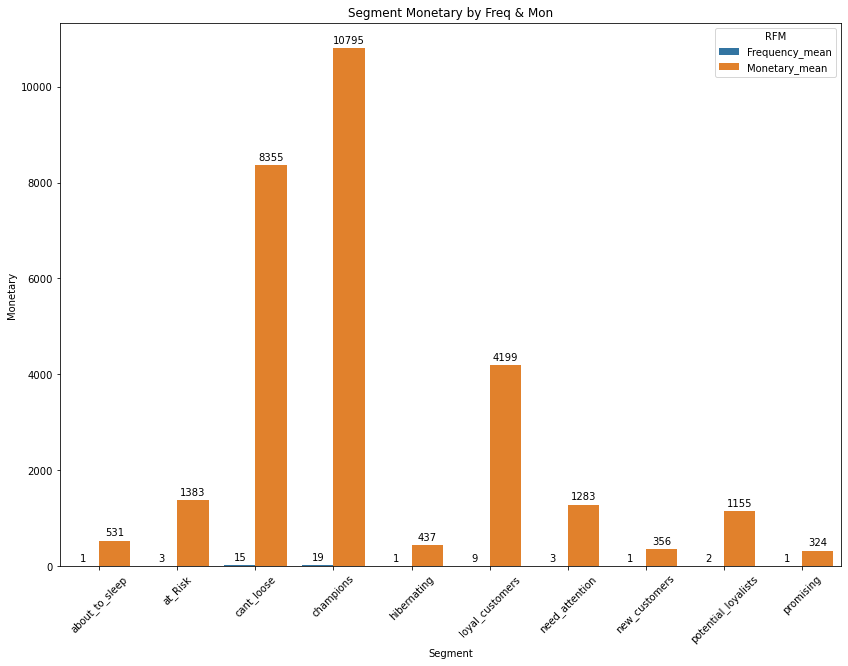

In [205]:
plt.figure(figsize=(14,10))
ax = sns.barplot(x='Segment', y='RFM Value', data=df_melt, hue='RFM')
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s=int(height), ha='center')
plt.title('Segment Monetary by Freq & Mon')
plt.xlabel('Segment')
plt.ylabel('Monetary')
plt.xticks(rotation=45)
plt.legend(title='RFM', loc='upper right')
plt.show()

In [206]:
df_melt = pd.melt(data, id_vars='Segment', var_name='RFM', value_name='RFM Value')
df_melt = df_melt[df_melt['RFM'].isin(['Recency_mean', 'Monetary_mean'])]
df_melt

,Segment,RFM,RFM Value
0,about_to_sleep,Recency_mean,106.618557
1,at_Risk,Recency_mean,372.942667
2,cant_loose,Recency_mean,330.802817
3,champions,Recency_mean,8.250000
4,hibernating,Recency_mean,459.012484
5,loyal_customers,Recency_mean,67.306016
6,need_attention,Recency_mean,113.241636
7,new_customers,Recency_mean,10.303571
8,potential_loyalists,Recency_mean,25.297335
9,promising,Recency_mean,38.281818


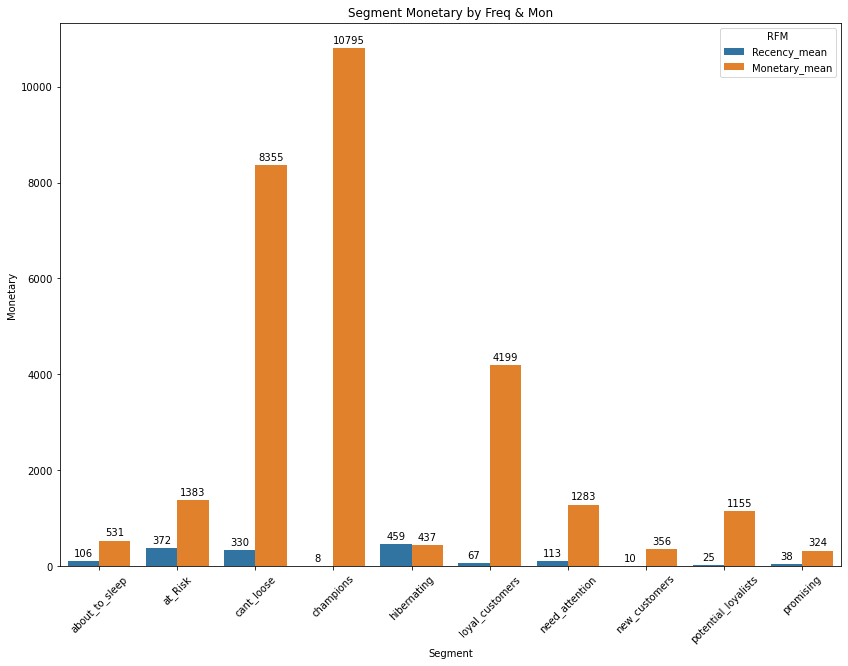

In [207]:
plt.figure(figsize=(14,10))
ax = sns.barplot(x='Segment', y='RFM Value', data=df_melt, hue='RFM')
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s=int(height), ha='center')
plt.title('Segment Monetary by Freq & Mon')
plt.xlabel('Segment')
plt.ylabel('Monetary')
plt.xticks(rotation=45)
plt.legend(title='RFM', loc='upper right')
plt.show()

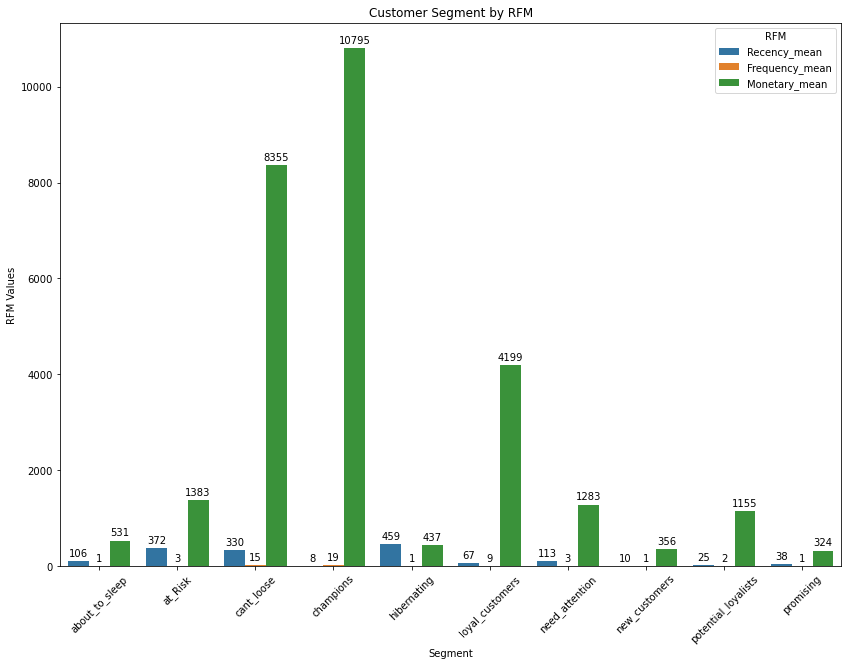

In [219]:
df_melt = pd.melt(data, id_vars='Segment', var_name='RFM', value_name='RFM Value')
plt.figure(figsize=(14,10))
ax = sns.barplot(x='Segment', y='RFM Value', data=df_melt, hue='RFM')
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+p.get_width()/2, y=height+100, s=int(height), ha='center')
plt.title('Customer Segment by RFM')
plt.xlabel('Segment')
plt.ylabel('RFM Values')
plt.xticks(rotation=45)
plt.legend(title='RFM', loc='upper right')
plt.savefig('RFM.jpg')
plt.show()